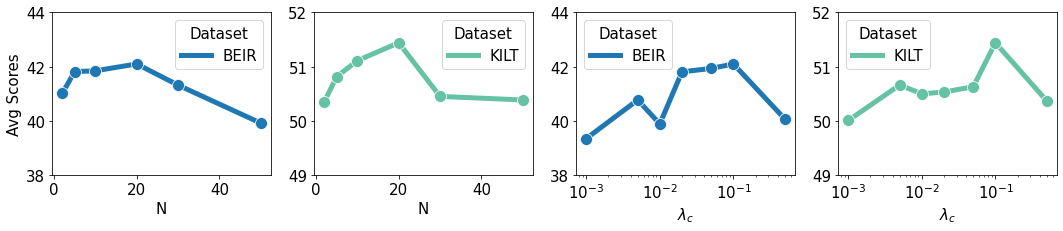

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')
import matplotlib
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 18,3
rcParams['font.size'] = 15



# be = '41.01548706	41.49618211	41.81748249	41.84810093	42.10001307	41.32211599	39.9249255'
# ke = '50.35462778	50.09150758	50.81508812	51.11109834	51.43999859	50.45329785	50.3875178'
be = '41.01548706	41.81748249	41.84810093	42.10001307	41.32211599	39.9249255'
ke = '50.35462778	50.81508812	51.11109834	51.43999859	50.45329785	50.3875178'

bj = '39.35692715	40.775285	39.89534023	41.80881079	41.93614095	42.1000058	40.07841962'
kj = '50.01029619	50.66402556	50.50059321	50.53327968	50.63133909	51.44000231	50.36984734'

pc_dict = {'Dataset':[],'Avg Scores':[],'N':[]}
js_dict = {'Dataset':[],'Avg Scores':[],'$\lambda_c$':[]}

# pc = [2,3,5,10,20,30,50]
pc = [2,5,10,20,30,50]

for i,s in zip(pc,be.split('\t')):
    pc_dict['Dataset'].append('BEIR')
    pc_dict['Avg Scores'].append(float(s))
    pc_dict['N'].append(i)
    
for i,s in zip(pc,ke.split('\t')):
    pc_dict['Dataset'].append('KILT')
    pc_dict['Avg Scores'].append(float(s))
    pc_dict['N'].append(i)

js = [0.001,0.005,0.01,0.02,0.05,0.1,0.5]
for i,s in zip(js,bj.split('\t')):
    js_dict['Dataset'].append('BEIR')
    js_dict['Avg Scores'].append(float(s))
    js_dict['$\lambda_c$'].append(i)
for i,s in zip(js,kj.split('\t')):
    js_dict['Dataset'].append('KILT')
    js_dict['Avg Scores'].append(float(s))
    js_dict['$\lambda_c$'].append(i)
    
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['SimHei']
# matplotlib.rcParams['axes.unicode_minus']=False


pdd = pd.DataFrame.from_dict(pc_dict)
jjs = pd.DataFrame.from_dict(js_dict)

fig, axs = plt.subplots(ncols=4)
# sns.set_theme(style="white")
# sns.set_theme(style="whitegrid")
paper_rc = {'lines.linewidth': 5, 'lines.markersize': 12, 'figure.figsize':(18,3), 'font_scale':5, 'fontsize':15}  
# sns.set(font_scale=1.3)
sns.set_context(None, rc = paper_rc,font_scale=5)   



sns.lineplot(y='Avg Scores',x='N', hue='Dataset',data=pdd[pdd["Dataset"]=='BEIR'], ax=axs[0],marker='o')
axs[0].set_ylim(35+3,45-1)
# axs[0].set(xscale="log")
sns.lineplot(y='Avg Scores',x='N', hue='Dataset',data=pdd[pdd["Dataset"]=='KILT'], palette='Set2',ax=axs[1],marker='o')
axs[1].set_ylabel('')
axs[1].set_ylim(49+0,52+0)

sns.lineplot(y='Avg Scores',x='$\lambda_c$', hue='Dataset',data=jjs[jjs["Dataset"]=='BEIR'], ax=axs[2],marker='o')
axs[2].set_ylabel('')
axs[2].set_ylim(35+3,45-1)
axs[2].set(xscale="log")
sns.lineplot(y='Avg Scores',x='$\lambda_c$', hue='Dataset',data=jjs[jjs["Dataset"]=='KILT'],palette='Set2', ax=axs[3],marker='o')
axs[3].set_ylabel('')
axs[3].set_ylim(49+0,52+0)
axs[3].set(xscale="log")
# sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
# sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
# for ax in axs:
#     handles, labels = ax.get_legend_handles_labels()
#     ax.legend(handles=handles[1:], labels=labels[1:])
plt.savefig("parameters-plot.pdf") 

SPLADE
SPLADE-prefix
SPLADE-HypeR
DPR
DPR-prefix
DPR-HypeR
BM25


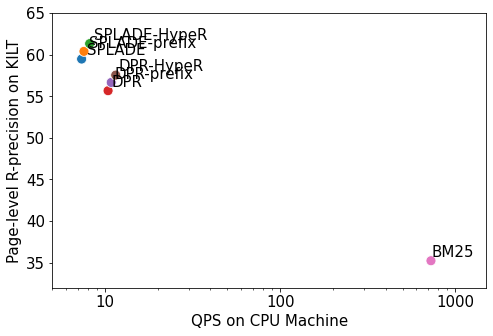

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')
import matplotlib
from matplotlib import rcParams
paper_rc = {'lines.linewidth': 5, 'lines.markersize': 12, 'figure.figsize':(10,10), 'font_scale':50, 'fontsize':15}  
# sns.set(font_scale=1.3)
# sns.set_theme(style="white")
# sns.set_context("", rc = paper_rc,font_scale=2)   
# sns.set(font_scale=2)
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 14/1.8,12/1.8*264/348

rcParams['font.size']= 15

qps_dict = {'Methods':[],'Page-level R-precision on KILT':[],"QPS on CPU Machine":[]}

s = [59.46,60.38,61.31,55.66,56.65,57.53,35.25]    
q = [7.36, 7.59, 8.18, 10.42, 10.86, 11.52, 725.8] 
# for i in range(len(q)):
#     q[i] = q[i] -7
# m = ['SPLADEv2','DocT5','SimLM','HypeR','AR2','BM25']
m = ['SPLADE','SPLADE-prefix','SPLADE-HypeR','DPR','DPR-prefix','DPR-HypeR','BM25']

h = [0.5]*len(m)
skip_list = ['SimLM']

for a,b,c in zip(s,q,m):
    if c in skip_list:
        continue
    else:
        print(c)
    qps_dict['Page-level R-precision on KILT'].append(a)
    qps_dict['QPS on CPU Machine'].append(b)
    qps_dict['Methods'].append(c)
    
ax = sns.scatterplot(y='Page-level R-precision on KILT',x='QPS on CPU Machine', hue='Methods',data=pd.DataFrame.from_dict(qps_dict),legend = False,s=100)
for i, txt in enumerate(m):
    if txt in skip_list:
        continue
    ax.annotate(txt, (q[i]+0.5, s[i]+h[i]))
ax.set_ylim(32,65)
ax.set_xlim(5,1500)
# print(ax.get_xticks())
 
# ax.set(xscale="log")
# ax.set(xscale=matplotlib.scale.LogScale(axis, *, base=10, subs=None, nonpositive='clip'))
plt.xscale('log')
# plt.yscale('log')
# ax.axis('tight')
# ax.set_xscale('log',base=100,subs=[1,100,2000])
# ax.set_xticks([7,10 , 500])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.savefig("qps-plot.pdf") 

SPLADE
SPLADE-prefix
SPLADE-HypeR
DPR
DPR-prefix
DPR-HypeR


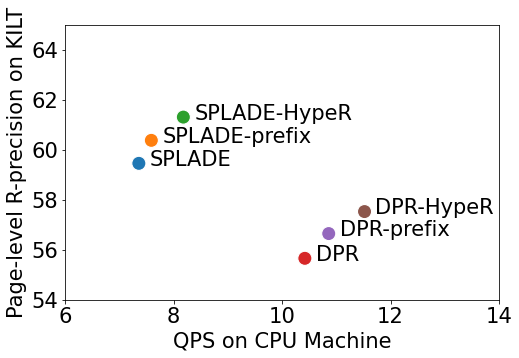

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')
import matplotlib
from matplotlib import rcParams
paper_rc = {'lines.linewidth': 5, 'lines.markersize': 12, 'figure.figsize':(10,10), 'font_scale':50, 'fontsize':15}  
# sns.set(font_scale=1.3)
# sns.set_theme(style="white")
# sns.set_context("", rc = paper_rc,font_scale=2)   
# sns.set(font_scale=2)
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 14/1.8,12/1.8*264/348

rcParams['font.size']= 21

qps_dict = {'Methods':[],'Page-level R-precision on KILT':[],"QPS on CPU Machine":[]}

s = [59.46,60.38,61.31,55.66,56.65,57.53]    
q = [7.36, 7.59, 8.18, 10.42, 10.86, 11.52] 
# for i in range(len(q)):
#     q[i] = q[i] -7
# m = ['SPLADEv2','DocT5','SimLM','HypeR','AR2','BM25']
m = ['SPLADE','SPLADE-prefix','SPLADE-HypeR','DPR','DPR-prefix','DPR-HypeR']

h = [-0.1]*len(m)
skip_list = ['SimLM']

for a,b,c in zip(s,q,m):
    if c in skip_list:
        continue
    else:
        print(c)
    qps_dict['Page-level R-precision on KILT'].append(a)
    qps_dict['QPS on CPU Machine'].append(b)
    qps_dict['Methods'].append(c)
    
ax = sns.scatterplot(y='Page-level R-precision on KILT',x='QPS on CPU Machine', hue='Methods',data=pd.DataFrame.from_dict(qps_dict),legend = False,s=200)
for i, txt in enumerate(m):
    if txt in skip_list:
        continue
    ax.annotate(txt, (q[i]+0.2, s[i]+h[i]))
ax.set_ylim(54,65)
ax.set_xlim(6,14)
# print(ax.get_xticks())
 
# ax.set(xscale="log")
# ax.set(xscale=matplotlib.scale.LogScale(axis, *, base=10, subs=None, nonpositive='clip'))
# plt.xscale('log')
# plt.yscale('log')
# ax.axis('tight')
# ax.set_xscale('log',base=100,subs=[1,100,2000])
# ax.set_xticks([7,10 , 500])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.savefig("qps-plot.pdf") 

In [2]:
import matplotlib

ModuleNotFoundError: No module named 'matplotlib'

SPLADE
SPLADE-HypeR
DPR
DPR-HypeR
BM25
HypeR-256
HypeR-128
HypeR-64


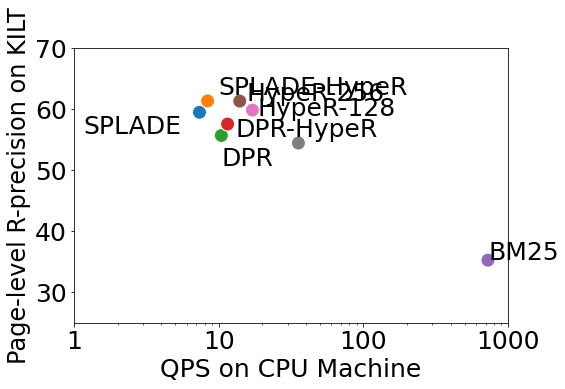

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from matplotlib import rcParams
paper_rc = {'lines.linewidth': 5, 'lines.markersize': 12, 'figure.figsize':(10,10), 'font_scale':50, 'fontsize':15}  
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 14/1.8,12/1.8*264/348

rcParams['font.size']= 25

qps_dict = {'Methods':[],'Page-level R-precision on KILT':[],"QPS on CPU Machine":[]}

s = [59.46, 60.38, 61.31, 55.66, 56.65, 57.53, 35.25, 61.29, 59.82, 54.42]
q = [7.36, 7.59, 8.38, 10.42, 10.86, 11.52, 725.8, 8.38/1.83*3.05, 8.38/1.83*3.73, 8.38/1.83*7.76] 

m = ['SPLADE','SPLADE-prefix','SPLADE-HypeR','DPR','DPR-prefix','DPR-HypeR','BM25','HypeR-256','HypeR-128','HypeR-64']

h = [0]*len(m)
w = [1.5]*len(m)
skip_list = ['SPLADE-prefix','DPR-prefix']

for a,b,c in zip(s,q,m):
    if c in skip_list:
        continue
    else:
        print(c)
    qps_dict['Page-level R-precision on KILT'].append(a)
    qps_dict['QPS on CPU Machine'].append(b)
    qps_dict['Methods'].append(c)

w[-1] = -550.5
h[-1] = 1
h[3] = -5
w[3] = 0
h[5] = -2
h[2] = 1
w[0] = -6.2
h[0] = -3.5
h[-2] = 0.7
h[-2] = -1

ax = sns.scatterplot(y='Page-level R-precision on KILT',x='QPS on CPU Machine', hue='Methods',data=pd.DataFrame.from_dict(qps_dict),legend = False,s=200)
for i, txt in enumerate(m):
    if txt in skip_list:
        continue
    ax.annotate(txt, (q[i]+w[i], s[i]+h[i]))
ax.set_ylim(25,70)
ax.set_xlim(1,1000)
plt.ylabel('Page-level R-precision on KILT', fontsize=24)
plt.xscale('log')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# plt.tight_layout()
plt.savefig("qps-plot.pdf") 

SPLADE
SPLADE-HypeR
DPR
DPR-HypeR
BM25
HypeR-256
HypeR-128
HypeR-64
HypeR-32
HypeR-16
HypeR-8
HypeR-4


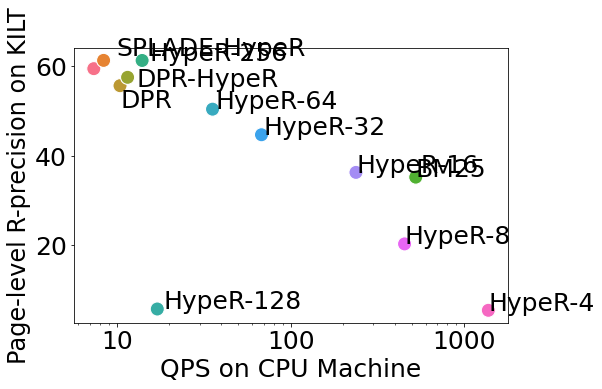

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from matplotlib import rcParams
paper_rc = {'lines.linewidth': 5, 'lines.markersize': 12, 'figure.figsize':(10,10), 'font_scale':50, 'fontsize':15}  
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 14/1.8,12/1.8*264/348

rcParams['font.size']= 25

qps_dict = {'Methods':[],'Page-level R-precision on KILT':[],"QPS on CPU Machine":[]}

s = [59.46, 60.38, 61.31, 55.66, 56.65, 57.53, 35.25, 61.29, 5.82, 50.42, 44.71, 36.31,20.35,5.53]
q = [7.36, 7.59, 8.38, 10.42, 10.86, 11.52, 525.8, 8.38/1.83*3.05, 8.38/1.83*3.73, 8.38/1.83*7.76, 8.38/1.83*14.85, 8.38/1.83*51.98, 8.38/1.83*99.01,8.38/1.83*300.70] 

m = ['SPLADE','SPLADE-prefix','SPLADE-HypeR','DPR','DPR-prefix','DPR-HypeR','BM25','HypeR-256','HypeR-128','HypeR-64','HypeR-32', 'HypeR-16', 'HypeR-8','HypeR-4']

h = [0]*len(m)
w = [1.5]*len(m)
skip_list = ['SPLADE-prefix','DPR-prefix']

for a,b,c in zip(s,q,m):
    if c in skip_list:
        continue
    else:
        print(c)
    qps_dict['Page-level R-precision on KILT'].append(a)
    qps_dict['QPS on CPU Machine'].append(b)
    qps_dict['Methods'].append(c)

# w[-1] = -550.5
# h[-1] = 1
h[3] = -5
w[3] = 0
h[5] = -2
h[2] = 1
w[0] = -6.2
h[0] = -3.5
# h[-2] = 0.7
# h[-2] = -1

ax = sns.scatterplot(y='Page-level R-precision on KILT',x='QPS on CPU Machine', hue='Methods',data=pd.DataFrame.from_dict(qps_dict),legend = False,s=200)
for i, txt in enumerate(m):
    if txt in skip_list:
        continue
    ax.annotate(txt, (q[i]+w[i], s[i]+h[i]))
# ax.set_ylim(25,70)
# ax.set_xlim(1,10000)
plt.ylabel('Page-level R-precision on KILT', fontsize=24)
plt.xscale('log')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# plt.tight_layout()
plt.savefig("qps-plot.pdf") 